In [51]:
from Layer import Layer
from NeuralNetwork import NeuralNetwork

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from genieclust.plots import plot_scatter

def load_data_classification(path, plot=False):
    raw = pd.read_csv(path)
    set_ = np.array(raw.loc[:, ["x", "y"]])
    labels_ = np.array(raw.cls)
    if plot:
        plot_scatter(set_, np.array(labels_)-1)
        plt.show()
    return set_, labels_.reshape(-1, 1)

class NeuralNetwork2(NeuralNetwork):
    def __init__(self, loss, momentum):
        self.epochs = 0
        self.train_loss = []
        self.test_loss = []
        self.history = []
        
        super().__init__(loss, momentum)
    
    def plot_error(self, train_loss=None, test_loss=None, epochs=None):
        if epochs is None:
            epochs = self.epochs
        if train_loss is None and test_loss is None:
            train_loss = self.train_loss
            test_loss = self.test_loss
            
        _, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(10, 3))
        sns.scatterplot(np.arange(epochs), train_loss, ax=ax1).set_title("Błąd na treningowym")
        sns.scatterplot(np.arange(epochs), test_loss, ax=ax2).set_title("Błąd na testowym")
        plt.show()
        
    def plot_results(self, set_):
        plot_scatter(set_, self.forward_pass(set_).argmax(axis=1))
        plt.show()
    
    def plots(self, set_, *args):
        self.plot_error(*args)
        self.plot_results(set_)
    
    def train_wrapper(self, train_set, train_labels, test_x=None, test_y=None, epochs=1, learning_rate=1e-2, verbose=True):
        self.epochs += epochs
        self.history.append({"epochs": epochs, "learning_rate": learning_rate})
        try:
            train_loss, test_loss, _ = self.train(train_set, train_labels, test_set, test_labels, epochs=epochs, learning_rate=learning_rate, verbose=verbose)
            self.train_loss += train_loss
            self.test_loss += test_loss
            
            self.plots(train_set, train_loss, test_loss, epochs)

        except KeyboardInterrupt:
            pass

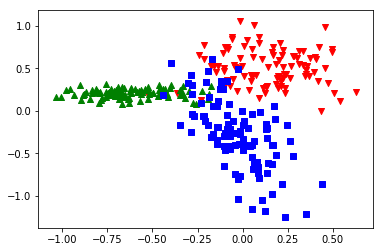

In [52]:
train_set, train_labels = load_data_classification("MGU_projekt1/Classification/data.three_gauss.train.100.csv", plot=True)
test_set, test_labels = load_data_classification("MGU_projekt1/Classification/data.three_gauss.test.100.csv")

In [93]:
np.random.seed(1234)
nn = NeuralNetwork2("cross_entropy", 0)

nn.add(Layer(10, 2, "sigmoid"))
nn.add(Layer(30, 10, "sigmoid"))
nn.add(Layer(3, 30, "softmax"))

# train_wrapper(train_set, train_labels, test_set, test_labels, epochs=300, learning_rate=1e-6)


# nn.forward_pass(train_set).argmax(axis=1)
# nn.plot_results(train_set)

# Podejście nr 1

```python
nn.add(Layer(50, 2, "sigmoid"))
nn.add(Layer(3, 50, "softmax"))
```

In [90]:
nn.history

[{'epochs': 10, 'learning_rate': 1e-05},
 {'epochs': 100, 'learning_rate': 1e-05},
 {'epochs': 100, 'learning_rate': 1e-05}]

99

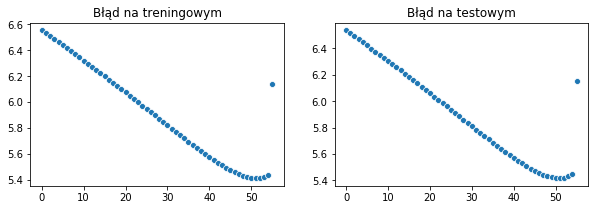

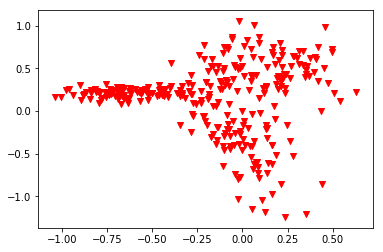

In [89]:
nn.train_wrapper(train_set, train_labels, test_set, test_labels, epochs=100, learning_rate=1e-5)

# Podejście nr 2

```python
nn.add(Layer(10, 2, "sigmoid"))
nn.add(Layer(30, 10, "sigmoid"))
nn.add(Layer(3, 30, "softmax"))
```

In [115]:
nn.epochs

1800

In [114]:
nn.history

([{'epochs': 100, 'learning_rate': 1e-06},
  {'epochs': 300, 'learning_rate': 1e-06},
  {'epochs': 300, 'learning_rate': 1e-06},
  {'epochs': 300, 'learning_rate': 1e-06},
  {'epochs': 500, 'learning_rate': 1e-06},
  {'epochs': 300, 'learning_rate': 1e-06}],
 1800)

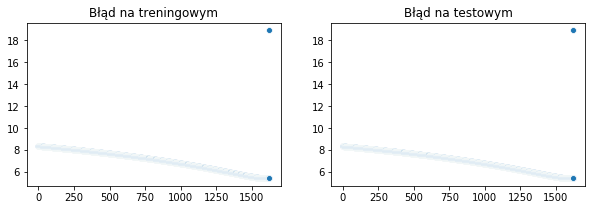

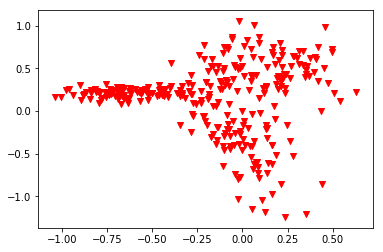

In [113]:
nn.plots(train_set)